In [307]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats

In [308]:
df = pd.read_excel("DATA.xlsx")

In [309]:
z = df.iloc[:, 2].values[:511].reshape(-1, 1)
y = df.iloc[:, 3].values[:511]
print(z)
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


# 1 

In [310]:
model = LinearRegression()
model.fit(z, y)

LinearRegression()

In [311]:
b_0 = model.intercept_
print('Свободный член уравнения регрессии ', b_0)
b_1 = model.coef_
print('Коэффициент наклона ', b_1)
print('коэффициент детерминации ', model.score(z, y))

Свободный член уравнения регрессии  23.114481440297773
Коэффициент наклона  [-6.9263486]
коэффициент детерминации  0.055455531346532805


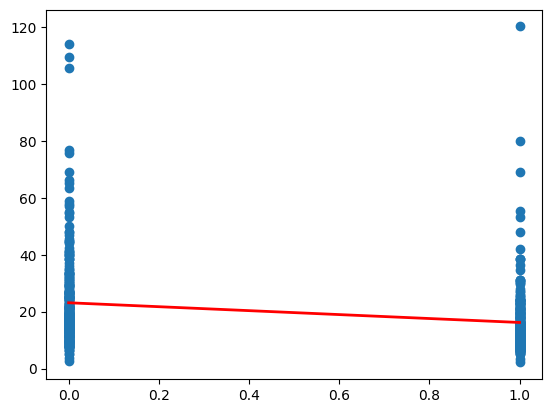

In [312]:
plt.scatter(z, y)
plt.plot(z, model.predict(z), color='red', linewidth=2)

In [313]:
y_pred = model.predict(z)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)
TSS = np.sum((y - y_mean)**2)

RSS = TSS - ESS
print(f'Ошибка регрессии RSS: {RSS}')
print(f'Общая сумма квадратов ESS: {ESS}')
print(f'Остаточная сумма квадратов TSS: {TSS}')

R_2 = 1 - ESS/TSS
print(f"Коэффициент детерминации R^2: {R_2}")

Ошибка регрессии RSS: 6108.978519957425
Общая сумма квадратов ESS: 104050.97075152988
Остаточная сумма квадратов TSS: 110159.9492714873
Коэффициент детерминации R^2: 0.055455531346532805


# 2 

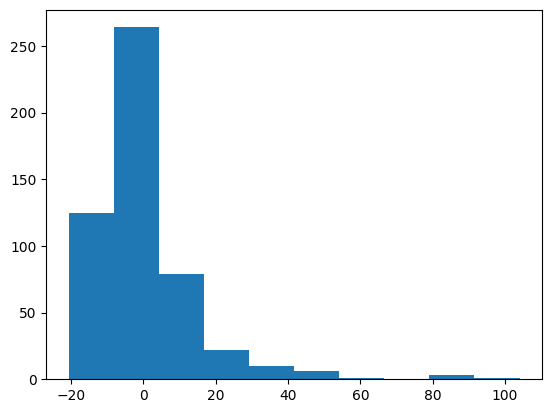

ShapiroResult(statistic=np.float64(0.744009748780335), pvalue=np.float64(2.427480246347121e-27))

In [314]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [315]:
from scipy.stats import f
n = 511
alpha = 0.06
m = 1
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")
print("H0: R^2 - незначим \nH1: R^2 - значим")
if F > F_cr:
    print(f"Отвергаем H0. Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Принимаем H0. Коээфициент R2 не значим на уровне alpha = {alpha}")

F - наблюдаемое значение: 29.884104340397133
F_cr - критическое значение: 3.5532037245336534
H0: R^2 - незначим 
H1: R^2 - значим
Отвергаем H0. Коээфициент R2 значим на уровне alpha = 0.06


In [316]:
import statsmodels.api as sm
X_new = sm.add_constant(z)
model_1 = sm.OLS(y, X_new).fit()
print(model_1.summary(alpha=0.06))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     29.88
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           7.20e-08
Time:                        19:03:26   Log-Likelihood:                -2083.4
No. Observations:                 511   AIC:                             4171.
Df Residuals:                     509   BIC:                             4179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.03       0.97]
------------------------------------------------------------------------------
const         23.1145      0.870     26.565      0.0

# 3

In [317]:
z_expirience = df.iloc[:, 0].values[:511]
z_education = df.iloc[:, 1].values[:511]
y = df.iloc[:, 3].values[:511]
X = np.column_stack((z_expirience, z_education))
print(X.shape)
print(y.shape)

(511, 2)
(511,)


In [318]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [319]:
b_0 = model.intercept_
print('intercept:', b_0)
b_1 = model.coef_
print(f'b_1 (Опыт работы):', b_1[0])
print(f'b_2 (Время потраченное на образование):', b_1[1])
print('Коэффициент детерминации:', model.score(X, y))
param_1 = 10
param_2 = 15
y_for_task = b_0 + b_1[0]*param_1 + b_1[1]*param_2
print(f"Изменение зарплаты при изменении опыта работы на {param_1} и времени на образование на {param_2}:", y_for_task)

intercept: -27.538761755406373
b_1 (Опыт работы): 0.5945822548964252
b_2 (Время потраченное на образование): 2.726843941843735
Коэффициент детерминации: 0.2052005254690319
Зарплата при изменении опыта работы на 10 и времени на образование на 15: 19.309719921213908


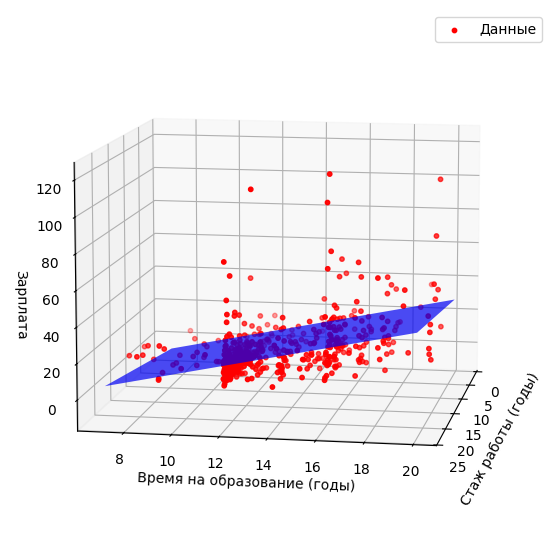

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


x1_range = np.linspace(min(z_expirience), max(z_expirience), 100)
x2_range = np.linspace(min(z_education), max(z_education), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)


X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))


y_grid = model.predict(X_grid)

y_grid = y_grid.reshape(x1_grid.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z_expirience, z_education, y, color='r', label='Данные', s=10)

ax.plot_surface(x1_grid, x2_grid, y_grid, color='b',
                alpha=0.7, rstride=100, cstride=100)


ax.set_xlabel('Стаж работы (годы)')
ax.set_ylabel('Время на образование (годы)')
ax.set_zlabel('Зарплата')

ax.legend()

ax.view_init(elev=10, azim=10)
plt.show()

# 4-5 

In [321]:
b_1 = model.coef_
print('Увеличение зарплаты если стаж увеличить на год:', b_1[0])
print('Увеличение зарплаты если время обучения увеличить на год:', b_1[1])

Увеличение зарплаты если стаж увеличить на год: 0.5945822548964252
Увеличение зарплаты если время обучения увеличить на год: 2.726843941843735


# 6 

In [322]:
n = len(y)
p = z.shape[1]

y_pred = model.predict(X)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)
TSS = np.sum((y - y_mean)**2)

RSS = TSS - ESS
print(f"RSS: {RSS}")
print(f"ESS: {ESS}")
print(f"TSS: {TSS}")

R_2 = 1 - ESS/TSS
print(f"R2: {R_2}")

RSS: 22604.879476151094
ESS: 87555.06979533621
TSS: 110159.9492714873
R2: 0.2052005254690319


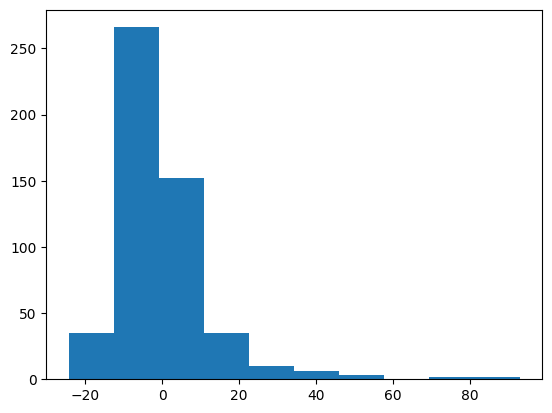

ShapiroResult(statistic=np.float64(0.765270409590762), pvalue=np.float64(2.2895187128732661e-26))

In [323]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [324]:
from scipy.stats import f
n = 511
alpha = 0.06
m = 2
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")
print("H0: R^2 - незначим \nH1: R^2 - значим")
if F > F_cr:
    print(f"Отвергаем H0. Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Принимаем H0. Коээфициент R2 не значим на уровне alpha = {alpha}")

F - наблюдаемое значение: 65.57746342232049
F_cr - критическое значение: 2.8290496641767975
H0: R^2 - незначим 
H1: R^2 - значим
Отвергаем H0. Коээфициент R2 значим на уровне alpha = 0.06


In [325]:
X_new = sm.add_constant(X)
model_2 = sm.OLS(y, X_new).fit()
print(model_2.summary(alpha=0.06))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     65.58
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           4.63e-26
Time:                        19:03:26   Log-Likelihood:                -2039.3
No. Observations:                 511   AIC:                             4085.
Df Residuals:                     508   BIC:                             4097.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.03       0.97]
------------------------------------------------------------------------------
const        -27.5388      4.462     -6.172      0.0

# 7 

In [326]:
errors = y - y_pred
n = len(y)
Se2 = np.sum(errors**2)/(n-2-1)
Se = np.sqrt(Se2)
print(Se)

13.12830909131555


In [327]:
n = len(y)
X_matr = np.column_stack((np.ones((n, 1)), z_expirience, z_education))
X_matr

array([[ 1.        , 22.38461494, 12.        ],
       [ 1.        ,  8.90384579, 12.        ],
       [ 1.        , 13.25      , 15.        ],
       ...,
       [ 1.        , 22.13461494, 13.        ],
       [ 1.        , 10.23076916, 17.        ],
       [ 1.        , 16.05769157, 13.        ]])

In [328]:
from scipy import linalg

X_matr_T = X_matr.transpose()
Z = X_matr_T.dot(X_matr)
Z_inv = linalg.inv(Z)

In [329]:
se_b_0 = Se*math.sqrt(Z_inv[0][0])
print(f"Стандартная ошибка коэффициента b_0: {se_b_0}")
se_b_1 = Se*math.sqrt(Z_inv[1][1])
print(f"Стандартная ошибка коэффициента b_1: {se_b_1}")
se_b_2_hat = Se*math.sqrt(Z_inv[2][2])
print(f"Стандартная ошибка коэффициента b_2_hat: {se_b_2_hat}")

Стандартная ошибка коэффициента b_0: 4.4620967816581
Стандартная ошибка коэффициента b_1: 0.1354048566511982
Стандартная ошибка коэффициента b_2_hat: 0.24148300020556304


In [330]:
gamma = 0.925
n = len(y)
m = 2
b_0 = model.intercept_
b_1 = model.coef_[0]
b_2 = model.coef_[1]

t_cr = stats.t.ppf((1+gamma)/2, n-m-1)
print(
    f"Доверительный интервал для b_0 на уровне надежности: {gamma}: {b_0 - (t_cr*se_b_0), b_0 + (t_cr*se_b_0)}")
print(
    f"Доверительный интервал для b_1 на уровне надежности: {gamma}: {b_1 - (t_cr*se_b_1), b_1 + (t_cr*se_b_1)}")
print(
    f"Доверительный интервал для b_2 на уровне надежности: {gamma}: {b_2 - (t_cr*se_b_2_hat), b_2 + (t_cr*se_b_2_hat)}")

Доверительный интервал для b_0 на уровне надежности: 0.925: (np.float64(-35.49970320580785), np.float64(-19.577820305004895))
Доверительный интервал для b_1 на уровне надежности: 0.925: (np.float64(0.353002973081827), np.float64(0.8361615367110236))
Доверительный интервал для b_2 на уровне надежности: 0.925: (np.float64(2.296007920131672), np.float64(3.157679963555798))


In [331]:
from scipy import stats
b_1 = model.coef_[0]
b_2 = model.coef_[1]

alpha = 0.06
n = len(y)
m = 2

t_1 = b_1 / se_b_1
print(f'СВ t_1:  {t_1}')
t_2 = b_2 / se_b_2_hat
print(f'СВ t_2:  {t_2}')

t_cr = stats.t.ppf(1-alpha/2, n - m - 1)
print(t_cr)

if -t_cr < t_1 < t_cr:
    print(f"Коэффициент b1 не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b1 значим на уровне значимости alpha: {alpha}")

if -t_cr < t_2 < t_cr:
    print(f"Коэффициент b2 не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b2 значим на уровне значимости alpha: {alpha}")

СВ t_1:  4.391144229250686
СВ t_2:  11.292074139887703
1.8850026441034828
Коэффициент b1 значим на уровне значимости alpha: 0.06
Коэффициент b2 значим на уровне значимости alpha: 0.06
